In [2]:
from sympy.printing.pytorch import torch

print(f"torch version: {torch.__version__}")
print(f"是否支持 NVIDIA GPU 加速: {torch.cuda.is_available()}")
print(f"是否支持 Apple Silicon 芯片加速: {torch.backends.mps.is_available()}")

torch version: 2.8.0
是否支持 NVIDIA GPU 加速: False
是否支持 Apple Silicon 芯片加速: True


# 数据操作
:label:`sec_ndarray`

为了能够完成各种数据操作，我们需要某种方法来存储和操作数据。
* 获取数据；
* 将数据读入计算机后对其进行处理。

首先，我们介绍 $n$ 维数组，也称为 *张量*（tensor）。
* 在MXNet中为 `ndarray`，
* PyTorch 和 TensorFlow 中为 `Tensor`
* Numpy： `ndarray`

深度学习框架又比 Numpy 的 `ndarray` 多一些重要功能：

计算后端支持：
* numpy.ndarray 主要设计用于 CPU 计算。
* pytorch.Tensor 支持 CPU 和 GPU (CUDA) 计算，这对于需要大量并行计算的深度学习任务至关重要，可以显著加速训练和推理过程。

自动微分：
* numpy.ndarray 本身不提供自动求导功能。
* pytorch.Tensor 是 PyTorch 深度学习框架的核心，原生支持自动微分（Autograd）。这使得在构建和训练神经网络时，可以自动计算梯度，这是训练模型的关键步骤。


## 张量初始化

首先，导入 `torch` 。请注意，虽然它被称为PyTorch，但是代码中使用 `torch` 而不是 `pytorch`

In [5]:
import torch

张量表示一个由数值组成的数组，这个数组可能有多个维度
* 具有一个轴的张量对应数学上的 *向量*（vector）；
* 具有两个轴的张量对应数学上的 *矩阵*（matrix）；
* 具有两个轴以上的张量没有特殊的数学名称。


首先，使用 `arange` 创建一个向量 `x`。这个行向量包含以 0 开始的前 12 个整数，它们默认创建为整数。也可指定创建类型为浮点数。

张量中的每个值都称为张量的 *元素*（element）。例如，张量 `x` 中有 12 个元素。除非额外指定，新的张量将存储在内存中，并采用基于CPU的计算。


In [6]:
x = torch.arange(12)
x

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

可以通过张量的 `shape` 属性来访问张量（沿每个轴的长度）的 *形状* 和张量中元素的总数。

In [7]:
x.shape

torch.Size([12])

如果只想知道张量中元素的总数，即形状的所有元素乘积，可以检查它的大小（size）。
因为这里在处理的是一个向量，所以它的`shape`与它的`size`相同。


In [8]:
x.numel()

12

要想改变一个张量的形状而不改变元素数量和元素值，可以调用 `reshape` 函数。

例如，可以把张量 `x` 从形状为（12,）的向量转换为形状为（3,4）的矩阵。

In [9]:
X = x.reshape(3, 4)
X

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

在上面的例子中，为了获得一个 3 行的矩阵，我们手动指定了它有 3 行和 4 列。
也可以用 `x.reshape(-1,4)` 或 `x.reshape(3,-1)` 来取代 `x.reshape(3,4)`。

使用全 0、全 1、其他常量，或者从特定分布中随机采样的数字：

In [10]:
torch.zeros((2, 3, 4))

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

创建单位矩阵 Tensor：单位矩阵是指主对角线上的元素都为 1 的矩阵。

In [21]:
torch.eye(5)

tensor([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]])

同样，我们可以创建一个形状为`(2,3,4)`的张量，其中所有元素都设置为1。代码如下：


In [11]:
torch.ones((2, 3, 4))

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

torch.rand 用于生成数据类型为浮点型且维度指定的随机 Tensor，随机生成的浮点数据在 0~1 区间均匀分布。

In [22]:
torch.rand(3)

tensor([0.1969, 0.1430, 0.3298])

有时我们想通过 *从某个特定的概率分布中随机采样* 来得到张量中每个元素的值。

例如，当我们构造数组来作为神经网络中的参数时，我们通常会随机初始化参数的值。

以下代码创建一个形状为（3,4）的张量。其中的每个元素都从均值为 0、标准差为 1 的标准高斯分布（正态分布）中随机采样。

In [12]:
torch.randn(3, 4)

tensor([[-0.9509,  0.5276, -0.1843,  0.1060],
        [ 0.1019, -0.8144, -0.8904, -1.4677],
        [ 0.8722,  0.5286, -1.9017, -1.2340]])

torch.normal 用于生成数据类型为浮点型且维度指定的随机 Tensor，可以指定均值和标准差

In [24]:
torch.normal(mean=0, std=1, size=(2,2,3))

tensor([[[-1.0190, -1.0322, -1.8399],
         [ 0.1970,  0.4885,  1.2506]],

        [[ 1.2020,  0.3440, -0.2949],
         [-1.5890,  0.5834,  1.1374]]])

torch.randint 用于生成随机整数的 Tensor，其内部填充的是在[low,high) 均匀生成的随机整数。

In [26]:
torch.randint(low=0, high=5, size=(2,1,3))

tensor([[[3, 2, 2]],

        [[1, 2, 0]]])

In [27]:
torch.randint(low=0, high=5, size=(2,2,3))

tensor([[[3, 2, 0],
         [4, 0, 3]],

        [[3, 4, 0],
         [3, 4, 3]]])

我们还可以 **通过提供包含数值的Python列表（或嵌套列表），来为所需张量中的每个元素赋予确定值**。

在这里，最外层的列表对应于轴0，内层的列表对应于轴1。

In [13]:
torch.tensor([[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])

tensor([[2, 1, 4, 3],
        [1, 2, 3, 4],
        [4, 3, 2, 1]])

## 增减维度
### squeeze & unsqueeze

In [31]:
x = torch.rand(2,1,3)
print(f"x:\n{x}")
print(f"\nx.shape:\n{x.shape}")
y = x.squeeze(1)
print(f"y:\n{y}")
print(f"\ny.shape:\n{y.shape}")

# 将第 1 维度的数据删除得到 z, 由于第 1 维度为3，squeeze 不能删除
#z = y.squeeze(1)
#print(z)
#print(z.shape)
# 在第 1 维度插入一个维度
z = y.unsqueeze(1)
print(f"\nz:\n{z}")
print(f"\nz.shape:\n{z.shape}")

x:
tensor([[[0.6354, 0.0547, 0.7144]],

        [[0.0064, 0.1339, 0.9448]]])

x.shape:
torch.Size([2, 1, 3])
y:
tensor([[0.6354, 0.0547, 0.7144],
        [0.0064, 0.1339, 0.9448]])

y.shape:
torch.Size([2, 3])

z:
tensor([[[0.6354, 0.0547, 0.7144]],

        [[0.0064, 0.1339, 0.9448]]])

z.shape:
torch.Size([2, 1, 3])


## 连接操作

In [33]:
A=torch.ones(3,3)
B=2*torch.ones(3,3)
print(f"A:\n{A}")
print(f"\nB:\n{B}")
C = torch.cat((A,B), dim=0)
print(f"C:\n{C}")
D = torch.cat((A,B), dim=1)
print(f"D:\n{D}")

A:
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

B:
tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])
C:
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])
D:
tensor([[1., 1., 1., 2., 2., 2.],
        [1., 1., 1., 2., 2., 2.],
        [1., 1., 1., 2., 2., 2.]])


## 堆叠 stack

假设我们有两个二维矩阵 Tensor，把它们“堆叠”放在一起，构成一个三维的 Tensor，如下图：

<img src="../images/tensor_stack.png" width="20%"/>

In [37]:
A=torch.arange(0,4)
print(f"A:\n{A}")
B=torch.arange(5,9)
print(f"\nB:\n{B}")
C = torch.stack((A,B), dim=0)
print(f"\ntorch.stack((A,B), dim=0):\n{C}")
D = torch.stack((A,B), dim=1)
print(f"\ntorch.stack((A,B), dim=1):\n{D}")

A:
tensor([0, 1, 2, 3])

B:
tensor([5, 6, 7, 8])

torch.stack((A,B), dim=0):
tensor([[0, 1, 2, 3],
        [5, 6, 7, 8]])

torch.stack((A,B), dim=1):
tensor([[0, 5],
        [1, 6],
        [2, 7],
        [3, 8]])


## 切分操作
### 一维向量

In [40]:
A=torch.tensor([1,2,3,4,5,6,7,8,9,10])
print(f"A:\n{A}")
B = torch.chunk(A, 2, 0)
print(f"\ntorch.chunk(A, 2, 0):\n{B}")
B = torch.chunk(A, 3, 0)
print(f"\ntorch.chunk(A, 3, 0):\n{B}")

A:
tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

torch.chunk(A, 2, 0):
(tensor([1, 2, 3, 4, 5]), tensor([ 6,  7,  8,  9, 10]))

torch.chunk(A, 3, 0):
(tensor([1, 2, 3, 4]), tensor([5, 6, 7, 8]), tensor([ 9, 10]))


### 二维矩阵

In [41]:
x = torch.tensor([[1,2,3],[4,5,6],[7,8,9]])
print(x)
print(x.shape)

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
torch.Size([3, 3])


In [43]:
A=torch.ones(4,4)
print(A)
# 尝试将矩阵 A 的 0 维平均切分为 2 份
B = torch.chunk(input=A, chunks=2, dim=0)
print(f"B:\n{B}")

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
B:
(tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]]), tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]]))


In [47]:
A=torch.ones(4,4)
print(A)
# 尝试将矩阵 A 的 0 维切分为每份大小为 2 的矩阵
# split_size_or_sections: size of a single chunk or list of sizes for each chunk
B=torch.split(A, split_size_or_sections=2, dim=0)
print(f"\nB:\n{B}")
C=torch.split(A, split_size_or_sections=3, dim=0)
print(f"\nC:\n{C}")
D=torch.split(A, split_size_or_sections=(1,2,1), dim=0)
print(f"\nD:\n{D}")

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

B:
(tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]]), tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]]))

C:
(tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]), tensor([[1., 1., 1., 1.]]))

D:
(tensor([[1., 1., 1., 1.]]), tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]]), tensor([[1., 1., 1., 1.]]))


In [48]:
A=torch.arange(0,16).view(4,4)
print(A)
b=torch.unbind(A, 0)
print(b)
d=torch.unbind(A, 1)
print(d)

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15]])
(tensor([0, 1, 2, 3]), tensor([4, 5, 6, 7]), tensor([ 8,  9, 10, 11]), tensor([12, 13, 14, 15]))
(tensor([ 0,  4,  8, 12]), tensor([ 1,  5,  9, 13]), tensor([ 2,  6, 10, 14]), tensor([ 3,  7, 11, 15]))


## 索引操作

### index_select

In [49]:
A=torch.arange(0,16).view(4,4)
print(A)
B=torch.index_select(A,0,torch.tensor([1,3]))
print(B)
C=torch.index_select(A,1,torch.tensor([0,3]))
print(C)

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15]])
tensor([[ 4,  5,  6,  7],
        [12, 13, 14, 15]])
tensor([[ 0,  3],
        [ 4,  7],
        [ 8, 11],
        [12, 15]])


### masked_select

In [50]:
A=torch.rand(5)
print(A)
B=A>0.3
print(B)
C=torch.masked_select(A, B)
print(C)
D=torch.masked_select(A, A>0.3)
print(D)
A1=torch.rand(10, 3)
print(A1)

tensor([0.0532, 0.7556, 0.1031, 0.5389, 0.6527])
tensor([False,  True, False,  True,  True])
tensor([0.7556, 0.5389, 0.6527])
tensor([0.7556, 0.5389, 0.6527])
tensor([[0.4980, 0.0554, 0.7147],
        [0.8291, 0.6553, 0.2997],
        [0.0377, 0.6308, 0.1919],
        [0.1169, 0.1668, 0.0057],
        [0.9951, 0.1011, 0.0643],
        [0.1707, 0.5870, 0.2941],
        [0.8062, 0.4563, 0.2052],
        [0.5206, 0.0651, 0.3170],
        [0.1276, 0.4878, 0.9604],
        [0.0880, 0.4461, 0.4699]])


## 运算符

我们的兴趣不仅限于读取数据和写入数据。
我们想在这些数据上执行数学运算，其中最简单且最有用的操作是 *按元素*（elementwise）运算。它们将标准标量运算符应用于数组的每个元素。

对于将两个数组作为输入的函数，按元素运算将二元运算符应用于两个数组中的每对位置对应的元素。我们可以基于任何从标量到标量的函数来创建按元素函数。

在数学表示法中，我们将通过符号 $f: \mathbb{R} \rightarrow \mathbb{R}$ 来表示 *一元* 标量运算符（只接收一个输入）。

这意味着该函数从任何实数（ $\mathbb{R}$ ）映射到另一个实数。

同样，我们通过符号 $f: \mathbb{R}, \mathbb{R} \rightarrow \mathbb{R}$ 表示 *二元* 标量运算符，这意味着该函数接收两个输入，并产生一个输出。

给定同一形状的任意两个向量 $\mathbf{u}$ 和 $\mathbf{v}$ 和二元运算符 $f$，我们可以得到向量 $\mathbf{c} = F(\mathbf{u},\mathbf{v})$。

具体计算方法是 $c_i \gets f(u_i, v_i)$，其中 $c_i$ 、 $u_i$ 和 $v_i$ 分别是向量 $\mathbf{c}$ 、$\mathbf{u}$ 和 $\mathbf{v}$ 中的元素。
在这里，我们通过将标量函数升级为按元素向量运算来生成向量值 $F: \mathbb{R}^d, \mathbb{R}^d \rightarrow \mathbb{R}^d$。

对于任意具有相同形状的张量，**常见的标准算术运算符（ `+` 、`-` 、`*` 、`/` 和 `**` ）都可以被升级为按元素运算**。

我们可以在同一形状的任意两个张量上调用按元素操作。在下面的例子中，我们使用逗号来表示一个具有 4 个元素的元组，其中每个元素都是按元素操作的结果。


In [14]:
x = torch.tensor([1.0, 2, 4, 8])
y = torch.tensor([2, 2, 2, 2])
x + y, x - y, x * y, x / y, x ** y  # **运算符是求幂运算

(tensor([ 3.,  4.,  6., 10.]),
 tensor([-1.,  0.,  2.,  6.]),
 tensor([ 2.,  4.,  8., 16.]),
 tensor([0.5000, 1.0000, 2.0000, 4.0000]),
 tensor([ 1.,  4., 16., 64.]))

**“按元素”方式可以应用更多的计算**，包括像求幂这样的一元运算符：$exp(x)$ 或 $e^x$

In [15]:
print(f"x:{x}")
print(torch.exp(x))

x:tensor([1., 2., 4., 8.])
tensor([2.7183e+00, 7.3891e+00, 5.4598e+01, 2.9810e+03])


$exp(x)$ 或 $e^x$ 定义：
* 这个函数的形式为 f(x) = $e^x$ ，其中 e 是一个无理数，称为自然常数或欧拉数 (Euler's number)。
* e 的近似值约为 2.718281828...。

重要性质：
* 导数特性：这个函数的一个关键特性是它的导数等于它本身，即 $d/dx (e^x)$ = $e^x$。这使得它在微积分和微分方程中非常重要。
* 增长特性：它是一个单调递增的函数，当 x 增大时，e^x 增长得非常快。
* 特殊点：当 x = 0 时，e^0 = 1。

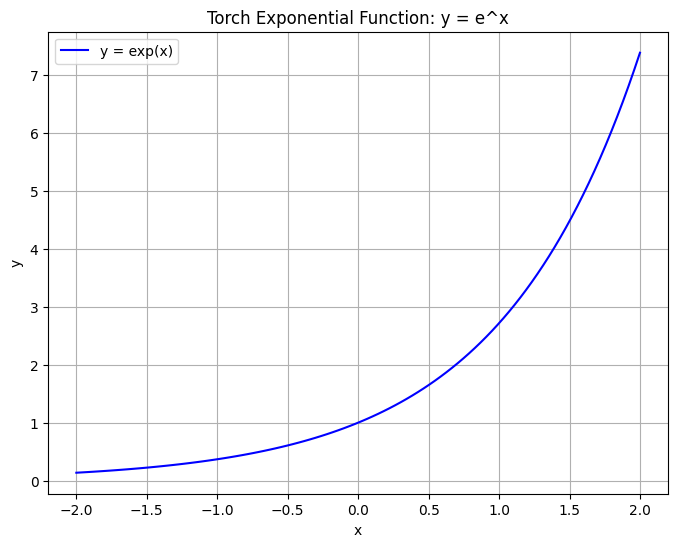

In [1]:
import torch
import matplotlib.pyplot as plt

# 创建x轴数据
x = torch.linspace(-2, 2, 100)
# 计算y值: y = e^x
y = torch.exp(x)

# 转换为numpy数组以便绘图
x_np = x.numpy()
y_np = y.numpy()

# 绘制图像
plt.figure(figsize=(8, 6))
plt.plot(x_np, y_np, label='y = exp(x)', color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Torch Exponential Function: y = e^x')
plt.grid(True)
plt.legend()
plt.show()


除了按元素计算外，我们还可以执行线性代数运算，包括向量点积和矩阵乘法。我们将在 :numref:`sec_linear-algebra`中解释线性代数的重点内容。

**我们也可以把多个张量 *连结*（concatenate）在一起**，把它们端对端地叠起来形成一个更大的张量。
我们只需要提供张量列表，并给出沿哪个轴连结。下面的例子分别演示了当我们沿行（轴-0，形状的第一个元素）和按列（轴-1，形状的第二个元素）连结两个矩阵时，会发生什么情况。

我们可以看到，第一个输出张量的轴-0长度（$6$）是两个输入张量轴-0长度的总和（$3 + 3$）；
第二个输出张量的轴-1长度（$8$）是两个输入张量轴-1长度的总和（$4 + 4$）。


In [16]:
X = torch.arange(12, dtype=torch.float32).reshape((3,4))
Y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
X, Y, torch.cat((X, Y), dim=0), torch.cat((X, Y), dim=1)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]),
 tensor([[2., 1., 4., 3.],
         [1., 2., 3., 4.],
         [4., 3., 2., 1.]]),
 tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

有时，我们想 **通过 *逻辑运算符* 构建二元张量** 。以 `X == Y` 为例：对于每个位置，如果 `X` 和 `Y` 在该位置相等，则新张量中相应项的值为1。

这意味着逻辑语句 `X == Y` 在该位置处为真，否则该位置为0。

In [13]:
X == Y

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])

对张量中的所有元素进行求和，会产生一个单元素张量


In [14]:
X.sum()

tensor(66.)

## 广播机制
:label:`subsec_broadcasting`

在上面的部分中，我们看到了如何在相同形状的两个张量上执行按元素操作。

在某些情况下，**即使形状不同，我们仍然可以通过调用 *广播机制*（broadcasting mechanism）来执行按元素操作**。这种机制的工作方式如下：

1. 通过适当复制元素来扩展一个或两个数组，以便在转换之后，两个张量具有相同的形状；
2. 对生成的数组执行按元素操作。

在大多数情况下，我们将沿着数组中长度为1的轴进行广播，如下例子：


In [15]:
a = torch.arange(3).reshape((3, 1))
b = torch.arange(2).reshape((1, 2))
a, b

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]))

由于 `a` 和 `b` 分别是 $3\times1$ 和 $1\times2$ 矩阵，如果让它们相加，它们的形状不匹配。

我们将两个矩阵 *广播* 为一个更大的 $3\times2$ 矩阵，如下所示：矩阵 `a` 将复制列，矩阵 `b` 将复制行，然后再按元素相加。


In [16]:
a + b

tensor([[0, 1],
        [1, 2],
        [2, 3]])

## 索引和切片

就像在任何其他 Python 数组中一样，张量中的元素可以通过索引访问。与任何 Python 数组一样：第一个元素的索引是 0，最后一个元素索引是 -1；可以指定范围以包含第一个元素和最后一个之前的元素。

如下所示，我们**可以用 `[-1]` 选择最后一个元素，可以用 `[1:3]` 选择第二个和第三个元素**：


In [17]:
X, X[-1], X[1:3]

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]),
 tensor([ 8.,  9., 10., 11.]),
 tensor([[ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]))

[**除读取外，我们还可以通过指定索引来将元素写入矩阵。**]


In [18]:
X[1, 2] = 9
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  9.,  7.],
        [ 8.,  9., 10., 11.]])

如果我们想[**为多个元素赋值相同的值，我们只需要索引所有元素，然后为它们赋值。**]
例如，`[0:2, :]`访问第1行和第2行，其中“:”代表沿轴1（列）的所有元素。
虽然我们讨论的是矩阵的索引，但这也适用于向量和超过2个维度的张量。


In [19]:
X[0:2, :] = 12
X

tensor([[12., 12., 12., 12.],
        [12., 12., 12., 12.],
        [ 8.,  9., 10., 11.]])

## 转秩

在 PyTorch 中有两个函数，分别是 permute() 和 transpose() 可以用来实现矩阵的转秩，或者说交换不同维度的数据。比如在调整卷积层的尺寸、修改 channel 的顺序、变换全连接层的大小的时候，我们就要用到它们。

用 permute 函数可以对任意高维矩阵进行转置

In [5]:
x = torch.rand(2,3,5)
y = x.permute(2,1,0)
x.shape, y.shape

(torch.Size([2, 3, 5]), torch.Size([5, 3, 2]))

transpose，不同于 permute，它每次只能转换两个维度，或者说交换两个维度的数据。

In [10]:
y = x.transpose(1,0)
x.shape, y.shape

(torch.Size([2, 3, 5]), torch.Size([3, 2, 5]))

## 形状变换
### view() 与 reshape() 的区别
#### view()
* 只能用于连续张量
* 返回原张量的视图（view），不复制数据
* 如果张量非连续会报错
#### reshape()
* 可以用于任何张量
* 如果张量连续，行为与 view() 相同
* 如果张量非连续，会自动创建副本

In [18]:
x = torch.randn(4, 4)
print(f"x:\n{x.shape}")
x = x.view(2, 8)
print(f"\nx.view(2, 8):\n{x.shape}")

x = x.permute(1,0) # 改变了维度顺序，但内存不连续
print(f"\nx.permute(1, 0):\n{x.shape}")
# 尝试改变形状，但此时内存不连续导致失败
# x = x.view(4, 4)
# 先转换为连续张量再使用 view
x = x.contiguous().view(4, 4)
print(f"\nx.contiguous().view(4, 4):\n{x.shape}")

x:
torch.Size([4, 4])

x.view(2, 8):
torch.Size([2, 8])

x.permute(1, 0):
torch.Size([8, 2])

x.contiguous().view(4, 4):
torch.Size([4, 4])


In [19]:
# 连续张量 - 两者都可用
x = torch.randn(4, 4)
y1 = x.view(2, 8)      # 成功
y2 = x.reshape(2, 8)   # 成功

# 非连续张量
x = torch.randn(4, 4)
x = x.permute(1, 0)    # 变为非连续
# y1 = x.view(2, 8)    # 报错！
y2 = x.reshape(2, 8)   # 成功


## 节省内存

[**运行一些操作可能会导致为新结果分配内存**]。
例如，如果我们用`Y = X + Y`，我们将取消引用`Y`指向的张量，而是指向新分配的内存处的张量。

在下面的例子中，我们用Python的`id()`函数演示了这一点，
它给我们提供了内存中引用对象的确切地址。
运行`Y = Y + X`后，我们会发现`id(Y)`指向另一个位置。
这是因为Python首先计算`Y + X`，为结果分配新的内存，然后使`Y`指向内存中的这个新位置。


In [20]:
before = id(Y)
Y = Y + X
id(Y) == before

False

这可能是不可取的，原因有两个：

1. 首先，我们不想总是不必要地分配内存。在机器学习中，我们可能有数百兆的参数，并且在一秒内多次更新所有参数。通常情况下，我们希望原地执行这些更新；
2. 如果我们不原地更新，其他引用仍然会指向旧的内存位置，这样我们的某些代码可能会无意中引用旧的参数。


幸运的是，(**执行原地操作**)非常简单。
我们可以使用切片表示法将操作的结果分配给先前分配的数组，例如`Y[:] = <expression>`。
为了说明这一点，我们首先创建一个新的矩阵`Z`，其形状与另一个`Y`相同，
使用`zeros_like`来分配一个全$0$的块。


In [21]:
Z = torch.zeros_like(Y)
print('id(Z):', id(Z))
Z[:] = X + Y
print('id(Z):', id(Z))

id(Z): 140327634811696
id(Z): 140327634811696


[**如果在后续计算中没有重复使用`X`，
我们也可以使用`X[:] = X + Y`或`X += Y`来减少操作的内存开销。**]


In [22]:
before = id(X)
X += Y
id(X) == before

True

## 转换为其他Python对象


将深度学习框架定义的张量[**转换为NumPy张量（`ndarray`）**]很容易，反之也同样容易。
torch张量和numpy数组将共享它们的底层内存，就地操作更改一个张量也会同时更改另一个张量。


In [23]:
A = X.numpy()
B = torch.tensor(A)
type(A), type(B)

(numpy.ndarray, torch.Tensor)

要(**将大小为1的张量转换为Python标量**)，我们可以调用`item`函数或Python的内置函数。


In [24]:
a = torch.tensor([3.5])
a, a.item(), float(a), int(a)

(tensor([3.5000]), 3.5, 3.5, 3)

## 小结

* 深度学习存储和操作数据的主要接口是张量（ $n$ 维数组）。它提供了各种功能，包括基本数学运算、广播、索引、切片、内存节省和转换其他 Python 对象。